In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import tkinter as tk
# from tkinter import ttk, messagebox

In [7]:
df = pd.read_csv("USA_cars_datasets.csv")

In [8]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [9]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [10]:
df.corr()['price'].sort_values()

mileage   -0.400838
lot        0.159369
year       0.418274
price      1.000000
Name: price, dtype: float64

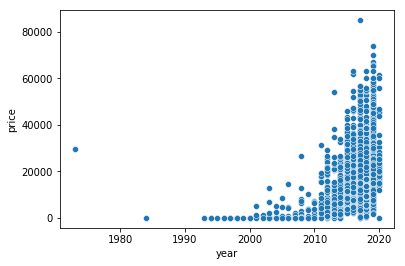

In [11]:
sns.scatterplot(x='year',y='price', data=df);

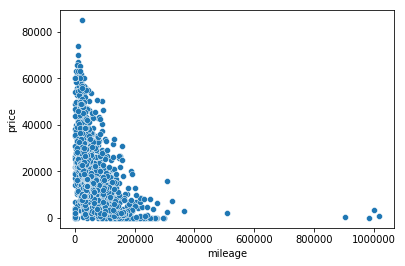

In [12]:
sns.scatterplot(x='mileage',y='price', data=df);

In [13]:
df = df[df['year'] > 2000 ]    

In [14]:
df = df[df['mileage'] < 200000] # removed all vehicles with milage greater than 200,000 miles

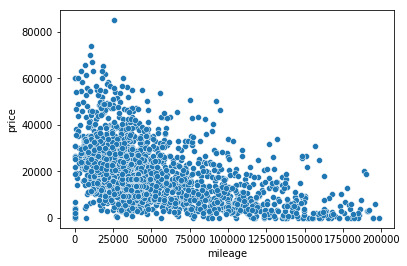

In [15]:
sns.scatterplot(x='mileage',y='price', data=df);

In [16]:
df = df[df['price'] < 60000] 

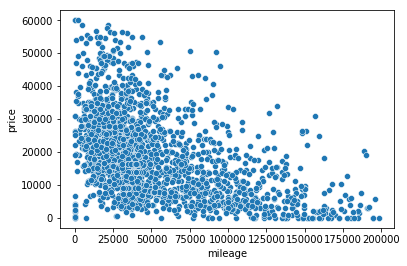

In [17]:
sns.scatterplot(x='mileage',y='price', data=df);

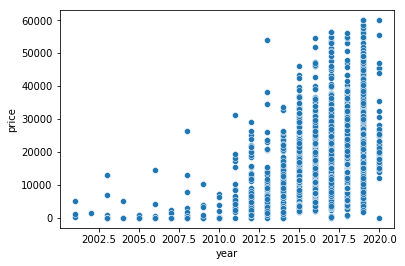

In [18]:
sns.scatterplot(x='year',y='price', data=df);

In [19]:
df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [20]:
df = df.drop(columns=['vin','lot','state','country','condition'],axis=1) # dropped columns that has little to no correleation and will not contribute to the model

In [21]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color'], dtype='object')

In [22]:
df.describe() # description prior to transforming catagorigal columns

,price,year,mileage
count,2430.000000,2430.000000,2430.000000
mean,18877.578601,2016.993004,47327.727160
std,11506.450474,2.636389,38102.658299
min,0.000000,2001.000000,0.000000
25%,10647.500000,2016.000000,21305.250000
50%,17000.000000,2018.000000,35022.000000
75%,25700.000000,2019.000000,59708.500000
max,59975.000000,2020.000000,198596.000000


In [23]:
 df.isnull().sum() # no null values to handle

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
dtype: int64

In [24]:
df.dtypes

price            int64
brand           object
model           object
year             int64
title_status    object
mileage          int64
color           object
dtype: object

In [25]:
my_objects_df = df.select_dtypes(include='object')

In [26]:
my_objects_df.head()

,brand,model,title_status,color
1,ford,se,clean vehicle,silver
2,dodge,mpv,clean vehicle,silver
3,ford,door,clean vehicle,blue
4,chevrolet,1500,clean vehicle,red
5,dodge,mpv,clean vehicle,white


In [27]:
# df = df.drop(columns=['brand','model','title_status','color'], axis=1) # remove these columns to avoid encoding. Especially when evaluating new data.

In [28]:
df.head() 


,price,brand,model,year,title_status,mileage,color
1,2899,ford,se,2011,clean vehicle,190552,silver
2,5350,dodge,mpv,2018,clean vehicle,39590,silver
3,25000,ford,door,2014,clean vehicle,64146,blue
4,27700,chevrolet,1500,2018,clean vehicle,6654,red
5,5700,dodge,mpv,2018,clean vehicle,45561,white


In [29]:
unique_title = df['title_status'].unique()

In [30]:
pd.Series(unique_title)

0        clean vehicle
1    salvage insurance
dtype: object

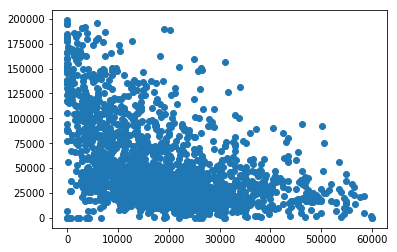

In [31]:
plt.scatter(df['price'],df['mileage']);

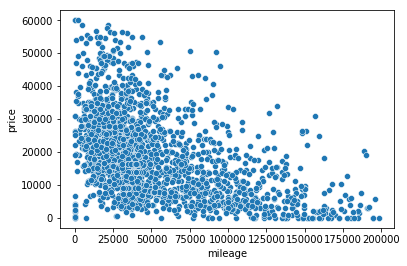

In [32]:
sns.scatterplot(data=df,x='mileage',y='price');

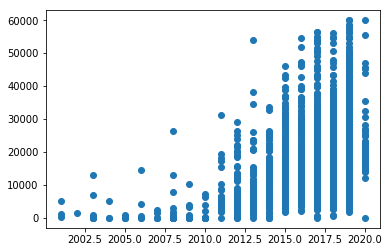

In [33]:
plt.scatter(df['year'],df['price']);

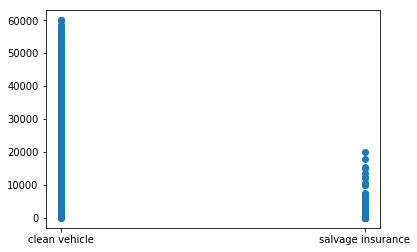

In [34]:
plt.scatter(df['title_status'],df['price']);

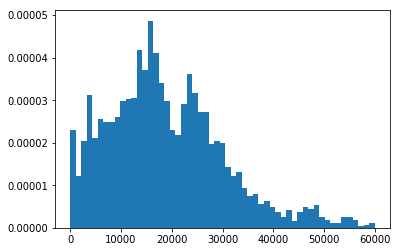

In [35]:
plt.hist(df['price'],bins=55, density=True);

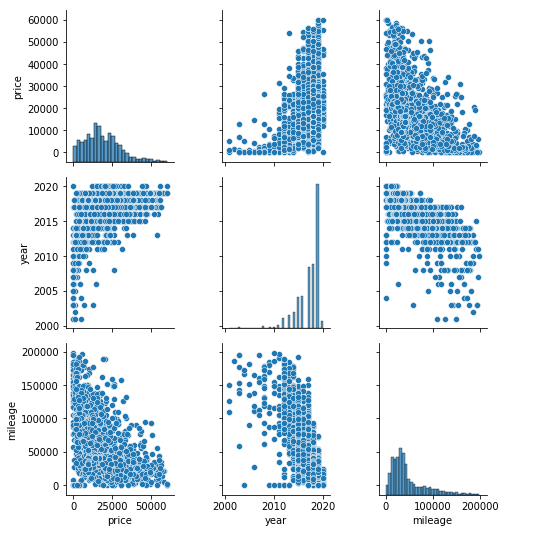

In [36]:
sns.pairplot(df);

In [37]:
df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
dtype: int64

In [38]:
my_numerical_df = df.select_dtypes(exclude='object')

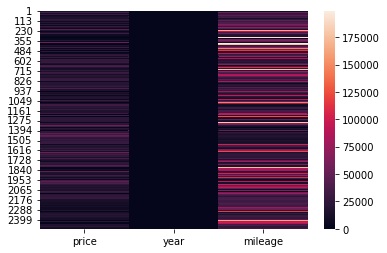

In [39]:
sns.heatmap(my_numerical_df);

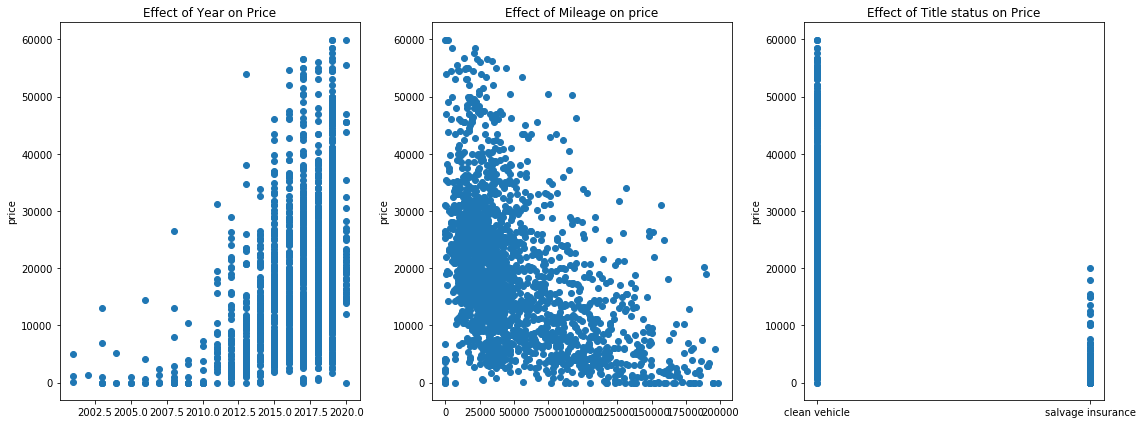

In [40]:
# Multiple Features (N-Dimensional)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['year'],df['price'],'o')
axes[0].set_ylabel("price")
axes[0].set_title("Effect of Year on Price")

axes[1].plot(df['mileage'],df['price'],'o')
axes[1].set_title("Effect of Mileage on price")
axes[1].set_ylabel("price")

axes[2].plot(df['title_status'],df['price'],'o')
axes[2].set_title("Effect of Title status on Price");
axes[2].set_ylabel("price")
plt.tight_layout();

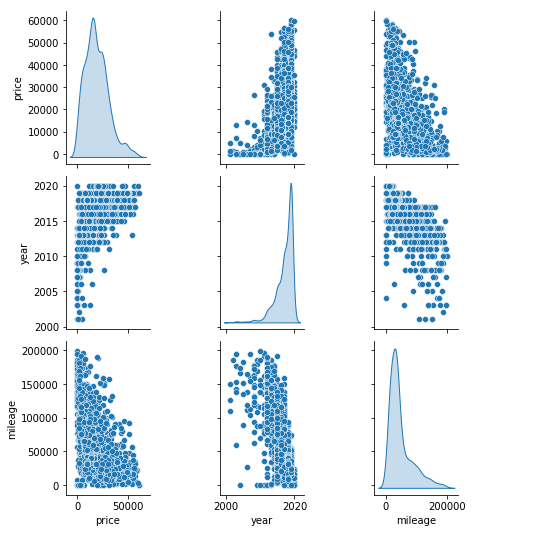

In [41]:
# Relationships between features
sns.pairplot(df,diag_kind='kde');

In [42]:
# Feature engineering: Alter the Title to be numberic --> clean title = 1
df.loc[df['title_status'] == 'clean vehicle','title_status'] = 1

In [43]:
df['title_status'].unique()

array([1, 'salvage insurance'], dtype=object)

In [44]:
# Feature engineering: Alter the Title to be numberic --> salvage title = 0
df.loc[df['title_status'] == 'salvage insurance','title_status'] = 0

In [45]:
df['title_status'].unique()

array([1, 0], dtype=int64)

In [46]:
df[df['title_status'] ==0].head()

,price,brand,model,year,title_status,mileage,color
141,0,dodge,van,2008,0,177948,orange
144,0,dodge,door,2014,0,123660,silver
206,25,chevrolet,vehicl,2020,0,7232,black
209,25,chrysler,door,2005,0,151815,silver
284,25,dodge,door,2007,0,160528,dark blue


In [47]:
df.head()

,price,brand,model,year,title_status,mileage,color
1,2899,ford,se,2011,1,190552,silver
2,5350,dodge,mpv,2018,1,39590,silver
3,25000,ford,door,2014,1,64146,blue
4,27700,chevrolet,1500,2018,1,6654,red
5,5700,dodge,mpv,2018,1,45561,white


In [48]:
df.to_csv('dataset_for_dash01.csv',index=False) # to be used for the dashboard.

In [49]:
# The price will be gauged against year, mileage and title status. 
# Drop off brand, model and color to avoid encoding and added columns.
df = df.drop(['brand','model','color'], axis=1)

In [50]:
df.head()

,price,year,title_status,mileage
1,2899,2011,1,190552
2,5350,2018,1,39590
3,25000,2014,1,64146
4,27700,2018,1,6654
5,5700,2018,1,45561


In [51]:
df.to_csv('final_features_01.csv')

In [52]:
#Prepare the features. X will hold the features.
X = df.drop('price', axis=1)

In [53]:
X.head()

,year,title_status,mileage
1,2011,1,190552
2,2018,1,39590
3,2014,1,64146
4,2018,1,6654
5,2018,1,45561


In [54]:
# The target for this ML will be the price. y will hold the target column.
y = df['price']

In [55]:
y.head()

1     2899
2     5350
3    25000
4    27700
5     5700
Name: price, dtype: int64

In [56]:
from sklearn.preprocessing import PolynomialFeatures # This is a feature converted tp polynomial

In [57]:
# Investigating if synergy exists between the features. Apply Polynomial Regression before using Linear Regression to improve
# the model.
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False) # examine various degree to apply to the data.

In [58]:
polynomial_converter.fit(X) # Note: Data does not need to be split yet. This is not the training model -- only a feature concerter.

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

In [59]:
poly_features = polynomial_converter.transform(X) # Transfor features to polynomial

In [60]:
# In order to failry train my model. I will separate my dataset into a training set and a test set. 
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=123)

In [62]:
# The chosen model for my ML project is LinearRegression

from sklearn.linear_model import LinearRegression

In [63]:
my_car_prediction_model = LinearRegression()

In [64]:
# Fit my data to the model. Note: I'm using only the training data and NOT the test data.
my_car_prediction_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# Now that the model is trained. I can now use it to make predictions on my test data.
test_predictions = my_car_prediction_model.predict(X_test)

In [66]:
# IMPORTANT: I need to evaluate how well my model has done against the data it has not seen i.e ( X_test)
# I will evaulate using MAE, RSME errors.

from sklearn.metrics import mean_absolute_error

In [67]:
# The average price for a car is:
df['price'].mean()

18877.578600823046

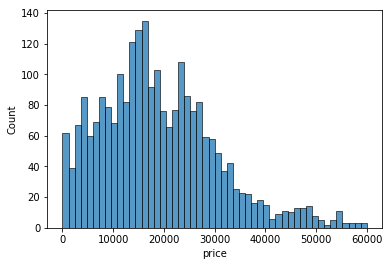

In [68]:
# The mean can also be seen graphically:
sns.histplot(data=df, x='price',bins=50);

In [69]:
MAE = mean_absolute_error(y_test,test_predictions)

In [70]:
MAE

7140.128446052554

In [71]:
# Management is okay with this margin of error. Hence, The model will be trained on all the dataset, 
# saved and deployed for usage.

my_final_car_prediction_model = LinearRegression()


In [72]:
my_final_car_prediction_model.fit(poly_features,y) # CHANGE - REMOVED DOT VALUE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
from joblib import dump, load

In [74]:
dump(my_final_car_prediction_model,'final_car_prediction_model.joblib')

['final_car_prediction_model.joblib']

In [75]:
dump(polynomial_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [76]:
# Reload the saved model to test.
loaded_model = load('final_car_prediction_model.joblib')

In [77]:
loaded_poly_converter = load('final_converter.joblib')

In [78]:
new_price_request = [[2020,1,52245]] # year=2020, title status=1 ( clean title), mileage=52,245

In [79]:
transformed_data_to_poly = loaded_poly_converter.fit_transform(new_price_request)

In [80]:
loaded_model.predict(transformed_data_to_poly) # 2899 was the actual price and 2421 was predicted by the model.

array([19201.01947611])

In [81]:
# main_root = tk.Tk()

# main_root.geometry('800x500')
# main_root.title('***Genesis Car Price Predictor***')
# main_root.columnconfigure(0, weight=1)

# my_model = load('final_car_prediction_model.joblib')

# car_year = tk.IntVar()
# mileage = tk.IntVar()
# title_st = tk.IntVar()
# predicted_price = tk.IntVar()

# layout_frame = ttk.Frame(main_root, padding=(50, 40, 50, 40))
# layout_frame.grid()

# company_label = ttk.Label(layout_frame, text="***WELCOME TO GENESIS CAR PRICE PREDICTOR***")
# company_label.grid(row=0, column=1, pady=10)

# car_year_label = ttk.Label(layout_frame, text='Enter Car Year: e.g: 2001:')
# car_year_label.grid(row=1, column=0, pady=10)
# car_year_entry = ttk.Entry(layout_frame, width=40, textvariable=car_year)
# car_year_entry.grid(row=1, column=1, pady=10)

# title_label = ttk.Label(layout_frame, text='Title Status: 1 = Clean Title, 0 = Salvage Title:   ')
# title_label.grid(row=2, column=0, pady=10)
# title_entry_cbo = ttk.Combobox(layout_frame, width=37, textvariable=title_st)
# title_entry_cbo['values'] = (1, 0)
# title_entry_cbo['state'] = 'readonly'
# title_entry_cbo.grid(row=2, column=1, pady=10)

# desired_mileage_label = ttk.Label(layout_frame, text='Desired Mileage: e.g - 50245:')
# desired_mileage_label.grid(row=3, column=0, pady=10)
# desired_mileage_entry = ttk.Entry(layout_frame, textvariable=mileage, width=40)
# desired_mileage_entry.grid(row=3, column=1, pady=10)

# predicted_price_label = ttk.Label(layout_frame, text='Predicted Price:')
# predicted_price_label.grid(row=4, column=0, pady=20)
# predicted_price_entry = ttk.Entry(layout_frame, width=40, textvariable=predicted_price)
# predicted_price_entry.grid(row=4, column=1, pady=20)


# def get_predicted_price():
#     try:
#         predicted_price_entry.delete(0, 'end')
#         car_year = int(car_year_entry.get())
#         title_st = int(title_entry_cbo.get())
#         mileage = int(desired_mileage_entry.get())
#         new_pred = [[car_year, title_st, mileage]]
#         transformed_data_to_poly = loaded_poly_converter.fit_transform(new_pred)
#         value = my_model.predict(transformed_data_to_poly)
#         predicted_price_entry.insert(0, f'$ {round(value[0], 2)}')

#         car_year_entry.delete(0, 'end')
#         title_entry_cbo.delete(0, 'end')
#         desired_mileage_entry.delete(0, 'end')
#     except:
#         messagebox.showerror('Input Error:', 'An Entry Error Occurred!, Please enter valid inputs')
#     finally:
#         print("End of function call...")


# submit_button = ttk.Button(layout_frame, text='Get Price', command=get_predicted_price)
# submit_button.grid(row=5, column=1, pady=15)

# quit_button = ttk.Button(layout_frame, text='Quit', command=main_root.destroy)
# quit_button.grid(row=6, column=1, pady=15)


# def clear_all_entries():
#     car_year_entry.delete(0, 'end')
#     title_entry_cbo.delete(0, 'end')
#     desired_mileage_entry.delete(0, 'end')
#     predicted_price_entry.delete(0, 'end')
#     title_entry_cbo.set("")


# clear_all_entries_button = ttk.Button(layout_frame, text='Clear All Entries', command=clear_all_entries)
# clear_all_entries_button.grid(row=7, column=1, pady=25)

# main_root.mainloop()
